# Projekt 3 - ML
### Krzysztof Kadowski

<b>TEMAT:</b> Estymacja zarobków developera/data scientista
<li>Predykcja zarobków pracownika IT na bazie corocznych ankiet stackoverflow. z lat 2017-2020.  Aplikacja przewidująca “ile powinienem zarabiać”.</li>
<li>Zbiór w dwóch wersjach - przeprocesowanej, gotowejdo użytku i w wersjisurowej. Gorąco zachęcam do eksplorowania danych surowych i korzystaniaze swoich pomysłów na preprocessing. Dostępne także ankiety z wcześniejszych lat pod adresem https://insights.stackoverflow.com/surveycodaje dodatkowe możliwości :)</li>

Główne cele projektu:
    <li>Machine learning</li>
    a. Obróbka i analiza danych - odrzucenie zbędnychzmiennych, przygotowaniedanych do modelowania etc.<br>
    b. Porównanie w zależności od typu problemu (regresja/klasyfikacja)różnegorodzaju modeli wraz z optymalizacją hiperparametrów<br>
    c. Zestawienie wyników z badań w formie adekwatnychwykresów i tabel.<br>
    d. Wszelkie inne dodatkowe rzeczy są na plus - np.zbadanie wpływu PCA na wyniki,weryfikacja interesujących hipotez o danych,w przypadku niektórych problemów zastosowanie zarówno podejścia regresyjnego,jak i  klasyfikacyjnego i co tamjeszcze sobie wymyślicie, możliwości zazwyczaj jest dużo :)<br>
    <li>Aplikacja</li>
    a. Prezentacja wartości biznesowej wynikającej z przygotowanegomodelu (np. poparte adekwatnymi wizualizacjami, tabelkami, możliwieinteraktywnymi). Jeśli to możliwe aplikacja powinnateż pozwalaćużytkownikowi na podanie wartości parametrów, pozwalającychuzyskać dla nich wynik najlepszego/wybranego modelu.<br>
    b. Jeśli umożliwiamy użytkownikowi podanie własnychdanych aplikacjapowinna je walidować, tj. możliwe powinno być podanietylko wartościz zakresu sensownego dla danej zmiennej.<br>
    c. Architektura aplikacji powinna wykorzystywać programowanie obiektowe.<br>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
from scipy import stats as st
from matplotlib.pylab import rcParams
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble  # pakiet z lasami decyzyjnymi
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from mlxtend import plotting
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


plt.rcParams["figure.figsize"] = (20,6)
%matplotlib inline


In [2]:
df = pd.read_csv("survey_final.csv")
df.head()

C:\Users\siedl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Hobbyist,ConvertedComp,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,UndergradMajor,YearsCodePro
0,2020,Yes,NaN,Germany,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master's degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Slightly satisfied,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,2 to 9 employees,"Computer science, computer engineering, or sof...",27
1,2020,No,NaN,United Kingdom,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Very dissatisfied,Python;Swift,JavaScript;Swift,"1,000 to 4,999 employees","Computer science, computer engineering, or sof...",4
2,2020,Yes,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN
3,2020,Yes,NaN,Albania,NaN,NaN,NaN,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Slightly dissatisfied,NaN,NaN,20 to 99 employees,"Computer science, computer engineering, or sof...",4
4,2020,Yes,NaN,United States,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,NaN,"Computer science, computer engineering, or sof...",8


In [3]:
df.columns 

Index(['Year', 'Hobbyist', 'ConvertedComp', 'Country',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel',
       'Employment', 'JobSat', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'OrgSize', 'UndergradMajor', 'YearsCodePro'],
      dtype='object')

<li>Year - rok badania</li>
<li>Hobbyist - czy hobbistycznie (Yes/No -> 0/1)</li>
<li>ConvertedComp - sallary (nany odrzucamy?)</li>
<li>Country - kraj (grupowanie?)</li>
<li>DatabaseDesireNextYear - zapotrzebowanie na bazę w następnym roku - (split)</li>
<li>DatabaseWorkedWith - bazy z którymi pracował - (split)</li>
<li>DevType - typ dewelopera - (split)</li>
<li>EdLevel - edukacja (sprawdzić czy nie ma dziwnych)</li>
<li>Employment - zatrudnienie</li>
<li>JobSat - satysfakcja z pracy (sprawdzić czy nie ma dziwnych)</li>
<li>LanguageDesireNextYear - zapotrzebowanie na język - (split)</li>
<li>LanguageWorkedWith - używane języki - (split)</li>
<li>OrgSize - rozmiar organizacji (sprawdzić czy sa dziwne)</li>
<li>UndergradMajor - zakres działalności - (split)</li>
<li>YearsCodePro - ile przepracowanych lat (sprawdzić % nanów i skew - wypełnić przez mean/median)</li>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303591 entries, 0 to 303590
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Year                    303591 non-null  int64  
 1   Hobbyist                303546 non-null  object 
 2   ConvertedComp           151172 non-null  float64
 3   Country                 302658 non-null  object 
 4   DatabaseDesireNextYear  200167 non-null  object 
 5   DatabaseWorkedWith      216942 non-null  object 
 6   DevType                 258928 non-null  object 
 7   EdLevel                 289916 non-null  object 
 8   Employment              297748 non-null  object 
 9   JobSat                  225834 non-null  object 
 10  LanguageDesireNextYear  248070 non-null  object 
 11  LanguageWorkedWith      257052 non-null  object 
 12  OrgSize                 226578 non-null  object 
 13  UndergradMajor          248486 non-null  object 
 14  YearsCodePro        

In [5]:
df.isna().sum()

Year                           0
Hobbyist                      45
ConvertedComp             152419
Country                      933
DatabaseDesireNextYear    103424
DatabaseWorkedWith         86649
DevType                    44663
EdLevel                    13675
Employment                  5843
JobSat                     77757
LanguageDesireNextYear     55521
LanguageWorkedWith         46539
OrgSize                    77013
UndergradMajor             55105
YearsCodePro               64118
dtype: int64

In [6]:
N = 303590
N

303590

In [7]:
print("Braki")
for i in df.columns:
    print(i,": " , round(100*df[i].isna().sum()/N,2), "%")

Braki
Year :  0.0 %
Hobbyist :  0.01 %
ConvertedComp :  50.21 %
Country :  0.31 %
DatabaseDesireNextYear :  34.07 %
DatabaseWorkedWith :  28.54 %
DevType :  14.71 %
EdLevel :  4.5 %
Employment :  1.92 %
JobSat :  25.61 %
LanguageDesireNextYear :  18.29 %
LanguageWorkedWith :  15.33 %
OrgSize :  25.37 %
UndergradMajor :  18.15 %
YearsCodePro :  21.12 %


In [8]:
df[~df.isna()]

,Year,Hobbyist,ConvertedComp,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,UndergradMajor,YearsCodePro
0,2020,Yes,NaN,Germany,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master's degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",Slightly satisfied,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,2 to 9 employees,"Computer science, computer engineering, or sof...",27
1,2020,No,NaN,United Kingdom,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Very dissatisfied,Python;Swift,JavaScript;Swift,"1,000 to 4,999 employees","Computer science, computer engineering, or sof...",4
2,2020,Yes,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN
3,2020,Yes,NaN,Albania,NaN,NaN,NaN,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Slightly dissatisfied,NaN,NaN,20 to 99 employees,"Computer science, computer engineering, or sof...",4
4,2020,Yes,NaN,United States,MySQL;PostgreSQL,MySQL;PostgreSQL;Redis;SQLite,NaN,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Java;Ruby;Scala,HTML/CSS;Ruby;SQL,NaN,"Computer science, computer engineering, or sof...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303586,2017,"Yes, I program as a hobby",58000.0,United States,SQL Server,MongoDB; SQL Server; MySQL,Web developer; Developer with a statistics or ...,Bachelor's degree,Employed full-time,3,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,100 to 499 employees,A social science,1 to 2 years
303587,2017,No,NaN,Venezuela,MySQL; PostgreSQL,SQL Server; PostgreSQL,NaN,Master's degree,Employed full-time,NaN,Java; SQL,C#; Java; JavaScript; PHP; Python; Ruby; SQL; ...,100 to 499 employees,Computer programming or Web development,NaN
303588,2017,"Yes, I program as a hobby",NaN,Canada,NaN,NaN,Web developer; Systems administrator,Some college/university study without earning ...,Employed full-time,10,NaN,NaN,10 to 19 employees,"Information technology, networking, or system ...",Less than a year
303589,2017,"Yes, I program as a hobby",40000.0,United States,MySQL,NaN,Web developer; Mobile developer,Bachelor's degree,Employed full-time,7,JavaScript; PHP; Swift,Clojure; Erlang; Haskell,Fewer than 10 employees,Computer science or software engineering,3 to 4 years


In [9]:
N = 303590
N

303590

In [10]:
print("Braki")
for i in df.columns:
    print(i,": " , round(100*df[i].isna().sum()/N,2), "%")

Braki
Year :  0.0 %
Hobbyist :  0.01 %
ConvertedComp :  50.21 %
Country :  0.31 %
DatabaseDesireNextYear :  34.07 %
DatabaseWorkedWith :  28.54 %
DevType :  14.71 %
EdLevel :  4.5 %
Employment :  1.92 %
JobSat :  25.61 %
LanguageDesireNextYear :  18.29 %
LanguageWorkedWith :  15.33 %
OrgSize :  25.37 %
UndergradMajor :  18.15 %
YearsCodePro :  21.12 %


In [11]:
#usuwanie dla ConvertedComp pustych wierszy 
df.dropna(subset = ["ConvertedComp"], inplace=True)
df

,Year,Hobbyist,ConvertedComp,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,UndergradMajor,YearsCodePro
7,2020,Yes,116000.00000,United States,MongoDB,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,JavaScript,Python;SQL,20 to 99 employees,"Computer science, computer engineering, or sof...",13
9,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master's degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Very satisfied,HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,2 to 9 employees,Mathematics or statistics,4
10,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...","Bachelor's degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Slightly dissatisfied,Go;JavaScript;Swift;TypeScript,C#;JavaScript;Swift,"10,000 or more employees","Computer science, computer engineering, or sof...",2
11,2020,No,14268.00000,Spain,NaN,NaN,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,Very dissatisfied,HTML/CSS;JavaScript,HTML/CSS;JavaScript,2 to 9 employees,Mathematics or statistics,7
12,2020,Yes,38916.00000,Netherlands,NaN,NaN,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",Employed full-time,Very satisfied,Python,C;JavaScript;Python,2 to 9 employees,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303570,2017,No,74193.54839,Netherlands,Redis; MySQL,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Bachelor's degree,Employed full-time,7,Go; JavaScript; Python,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,Computer science or software engineering,5 to 6 years
303577,2017,"Yes, I contribute to open source projects",107526.88170,Cyprus,MongoDB,MongoDB; MySQL,Mobile developer; DevOps specialist,Secondary school,Employed part-time,10,JavaScript; Objective-C; Python; Swift,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,NaN,5 to 6 years
303581,2017,"Yes, I program as a hobby",32258.06452,France,NaN,NaN,Web developer,Master's degree,Employed full-time,5,C#; JavaScript; TypeScript,JavaScript,100 to 499 employees,Computer science or software engineering,1 to 2 years
303586,2017,"Yes, I program as a hobby",58000.00000,United States,SQL Server,MongoDB; SQL Server; MySQL,Web developer; Developer with a statistics or ...,Bachelor's degree,Employed full-time,3,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,100 to 499 employees,A social science,1 to 2 years


In [12]:
df["EdLevel"].replace({
"Associate degree (A.A., A.S., etc.)":"Associate degree",
"Bachelor's degree (B.A., B.S., B.Eng., etc.":"Bachelor's degree",
"Bachelor's degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
"Bachelor‚'s degree (BA, BS, B.Eng., etc.)":"Bachelor's degree",
"Bachelor's degree (B.A., B.S., B.Eng., etc.)":"Bachelor's degree",
"Master's degree (M.A., M.S., M.Eng., MBA, etc.)":"Master's degree",
"Master's degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
"Master‚'s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
"Other doctoral degree (Ph.D, Ed.D., etc.)":"Doctoral degree",
"Other doctoral degree (Ph.D., Ed.D., etc.)":"Doctoral degree",
"Professional degree (JD, MD, etc.)":"Professional degree",
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school",
"Some college/university study without earning a bachelor's degree":"Some college/university study without earning a degree"
}, inplace=True)

In [13]:
df

,Year,Hobbyist,ConvertedComp,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,UndergradMajor,YearsCodePro
7,2020,Yes,116000.00000,United States,MongoDB,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,Slightly dissatisfied,JavaScript,Python;SQL,20 to 99 employees,"Computer science, computer engineering, or sof...",13
9,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...",Master's degree,Employed full-time,Very satisfied,HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,2 to 9 employees,Mathematics or statistics,4
10,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,Slightly dissatisfied,Go;JavaScript;Swift;TypeScript,C#;JavaScript;Swift,"10,000 or more employees","Computer science, computer engineering, or sof...",2
11,2020,No,14268.00000,Spain,NaN,NaN,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,Very dissatisfied,HTML/CSS;JavaScript,HTML/CSS;JavaScript,2 to 9 employees,Mathematics or statistics,7
12,2020,Yes,38916.00000,Netherlands,NaN,NaN,"Designer;Developer, back-end",Secondary school,Employed full-time,Very satisfied,Python,C;JavaScript;Python,2 to 9 employees,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303570,2017,No,74193.54839,Netherlands,Redis; MySQL,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Bachelor's degree,Employed full-time,7,Go; JavaScript; Python,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,Computer science or software engineering,5 to 6 years
303577,2017,"Yes, I contribute to open source projects",107526.88170,Cyprus,MongoDB,MongoDB; MySQL,Mobile developer; DevOps specialist,Secondary school,Employed part-time,10,JavaScript; Objective-C; Python; Swift,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,NaN,5 to 6 years
303581,2017,"Yes, I program as a hobby",32258.06452,France,NaN,NaN,Web developer,Master's degree,Employed full-time,5,C#; JavaScript; TypeScript,JavaScript,100 to 499 employees,Computer science or software engineering,1 to 2 years
303586,2017,"Yes, I program as a hobby",58000.00000,United States,SQL Server,MongoDB; SQL Server; MySQL,Web developer; Developer with a statistics or ...,Bachelor's degree,Employed full-time,3,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,100 to 499 employees,A social science,1 to 2 years


In [14]:
df["Hobbyist"].replace({
"Yes, I contribute to open source projects":"Yes",
"Yes, I program as a hobby":"Yes",
"Yes, both":"Yes"}, inplace=True)

In [15]:
df["Country"].replace({
"Azerbaidjan":"Azerbaijan",
"Bosnia-Herzegovina":"Bosnia and Herzegovina",
"CÃ´te d'Ivoire":"Ivory Coast",
"C√¥te d'Ivoire":"Ivory Coast",
"Hong Kong (S.A.R.)":"Hong Kong",
"Iran, Islamic Republic of...":"Iran",
"Lao People's Democratic Republic":"Laos",
"Libyan Arab Jamahiriya":"Libia",
"Republic of Korea":"Korea",
"South Korea":"Korea",
"Saint Vincent & Grenadines":"Saint Vincent and the Grenadines",
"Slovak Republic":"Slovakia",
"Syrian Arab Republic":"Syria",
"Tadjikistan":"Tajikistan",
"United Republic of Tanzania":"Tanzania",
"Venezuela, Bolivarian Republic of...":"Venezuela",
"Viet Nam":"Vietnam",
"Congo, Republic of the...":"Congo",
"Ivory Coast (Cote D'Ivoire)":"Ivory Coast"
}, inplace=True)

In [16]:
df["OrgSize"].replace({"2-9 employees":"Fewer than 10 employees", 
                       "2 to 9 employees":"Fewer than 10 employees", 
                       "Just me - I am a freelancer, sole proprietor, etc.":"1 - freelancer, sole prioprietor, etc."
                      }, inplace=True)

In [17]:
df["Employment"].replace({
    'Retired' : 'not employed',
    'Not employed, and not looking for work' : 'not employed',
    'Not employed, but looking for work': 'not employed',
    }, inplace=True)

df

,Year,Hobbyist,ConvertedComp,Country,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageDesireNextYear,LanguageWorkedWith,OrgSize,UndergradMajor,YearsCodePro
7,2020,Yes,116000.00000,United States,MongoDB,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,Slightly dissatisfied,JavaScript,Python;SQL,20 to 99 employees,"Computer science, computer engineering, or sof...",13
9,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...",Master's degree,Employed full-time,Very satisfied,HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Fewer than 10 employees,Mathematics or statistics,4
10,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,Slightly dissatisfied,Go;JavaScript;Swift;TypeScript,C#;JavaScript;Swift,"10,000 or more employees","Computer science, computer engineering, or sof...",2
11,2020,No,14268.00000,Spain,NaN,NaN,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,Very dissatisfied,HTML/CSS;JavaScript,HTML/CSS;JavaScript,Fewer than 10 employees,Mathematics or statistics,7
12,2020,Yes,38916.00000,Netherlands,NaN,NaN,"Designer;Developer, back-end",Secondary school,Employed full-time,Very satisfied,Python,C;JavaScript;Python,Fewer than 10 employees,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303570,2017,No,74193.54839,Netherlands,Redis; MySQL,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Bachelor's degree,Employed full-time,7,Go; JavaScript; Python,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,Computer science or software engineering,5 to 6 years
303577,2017,Yes,107526.88170,Cyprus,MongoDB,MongoDB; MySQL,Mobile developer; DevOps specialist,Secondary school,Employed part-time,10,JavaScript; Objective-C; Python; Swift,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,NaN,5 to 6 years
303581,2017,Yes,32258.06452,France,NaN,NaN,Web developer,Master's degree,Employed full-time,5,C#; JavaScript; TypeScript,JavaScript,100 to 499 employees,Computer science or software engineering,1 to 2 years
303586,2017,Yes,58000.00000,United States,SQL Server,MongoDB; SQL Server; MySQL,Web developer; Developer with a statistics or ...,Bachelor's degree,Employed full-time,3,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,100 to 499 employees,A social science,1 to 2 years


In [18]:
df.shape

(151172, 15)

In [19]:
df["JobSat"] = df["JobSat"].astype(str)
df["JobSat"].replace({
    'Extremely dissatisfied': '1',
    'Very dissatisfied': '1',
    'Moderately dissatisfied': '1',
    '0.0': '1',
    '1.0': '1',
    '2.0': '1',
    '3.0': '1',
    'Slightly dissatisfied': '2',
    'Neither satisfied nor dissatisfied': '2',
    'Slightly satisfied': '2',
    '4.0': '2',
    '5.0': '2',
    '6.0': '2',
    'Moderately satisfied': '3',
    'Very satisfied': '3',
    'Extremely satisfied': '3',
    '7.0': '3',
    '8.0': '3',
    '9.0': '3',
    '10.0': '3',
    }, inplace=True)

In [20]:
df['YearsCodePro'].replace({
    '1 to 2 years' : '2',
    '10 to 11 years' : '11',
    '11 to 12 years' : '12',
    '12 to 13 years' : '13',
    '12-14 years' : '13',
    '13 to 14 years' : '14',
    '14 to 15 years' : '15',
    '15 to 16 years' : '16',
    '15-17 years' : '16',
    '16 to 17 years' : '17',
    '17 to 18 years' : '18',
    '18 to 19 years' : '19',
    '18-20 years' : '19',
    '19 to 20 years' : '20',
    '2 to 3 years' : '3',
    '20 or more years' : '20',
    '21-23 years' : '22',
    '24-26 years' : '25',
    '27-29 years' : '28',
    '3 to 4 years' : '4',
    '30 or more years' : '30',
    '3-5 years' : '4',
    '4 to 5 years' : '5',
    '5 to 6 years' : '6',
    '6 to 7 years' : '7',
    '6-8 years' : '7',
    '7 to 8 years' : '8',
    '8 to 9 years' : '9',
    '9 to 10 years' : '10',
    '9-11 years' : '10',
    'Less than 1 year' : '1',
    'Less than a year' : '1',
    'More than 50 years' : '50'
}, inplace=True)

In [21]:
df.drop(["DatabaseDesireNextYear","LanguageDesireNextYear", "UndergradMajor"], axis="columns", inplace=True)

In [22]:
df.shape

(151172, 12)

In [23]:
df.columns

Index(['Year', 'Hobbyist', 'ConvertedComp', 'Country', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'JobSat', 'LanguageWorkedWith',
       'OrgSize', 'YearsCodePro'],
      dtype='object')

In [24]:
df

,Year,Hobbyist,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageWorkedWith,OrgSize,YearsCodePro
7,2020,Yes,116000.00000,United States,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,2,Python;SQL,20 to 99 employees,13
9,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...",Master's degree,Employed full-time,3,HTML/CSS;Java;JavaScript;Python;SQL,Fewer than 10 employees,4
10,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,2,C#;JavaScript;Swift,"10,000 or more employees",2
11,2020,No,14268.00000,Spain,NaN,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,1,HTML/CSS;JavaScript,Fewer than 10 employees,7
12,2020,Yes,38916.00000,Netherlands,NaN,"Designer;Developer, back-end",Secondary school,Employed full-time,3,C;JavaScript;Python,Fewer than 10 employees,20
...,...,...,...,...,...,...,...,...,...,...,...,...
303570,2017,No,74193.54839,Netherlands,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Bachelor's degree,Employed full-time,3,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,6
303577,2017,Yes,107526.88170,Cyprus,MongoDB; MySQL,Mobile developer; DevOps specialist,Secondary school,Employed part-time,3,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,6
303581,2017,Yes,32258.06452,France,NaN,Web developer,Master's degree,Employed full-time,2,JavaScript,100 to 499 employees,2
303586,2017,Yes,58000.00000,United States,MongoDB; SQL Server; MySQL,Web developer; Developer with a statistics or ...,Bachelor's degree,Employed full-time,1,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,100 to 499 employees,2


In [25]:
lista= [i for i in range(0, 151172)]
df.insert(0, 'ID', lista)
df

,ID,Year,Hobbyist,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageWorkedWith,OrgSize,YearsCodePro
7,0,2020,Yes,116000.00000,United States,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,2,Python;SQL,20 to 99 employees,13
9,1,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...",Master's degree,Employed full-time,3,HTML/CSS;Java;JavaScript;Python;SQL,Fewer than 10 employees,4
10,2,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,2,C#;JavaScript;Swift,"10,000 or more employees",2
11,3,2020,No,14268.00000,Spain,NaN,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,1,HTML/CSS;JavaScript,Fewer than 10 employees,7
12,4,2020,Yes,38916.00000,Netherlands,NaN,"Designer;Developer, back-end",Secondary school,Employed full-time,3,C;JavaScript;Python,Fewer than 10 employees,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303570,151167,2017,No,74193.54839,Netherlands,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Bachelor's degree,Employed full-time,3,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,6
303577,151168,2017,Yes,107526.88170,Cyprus,MongoDB; MySQL,Mobile developer; DevOps specialist,Secondary school,Employed part-time,3,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,6
303581,151169,2017,Yes,32258.06452,France,NaN,Web developer,Master's degree,Employed full-time,2,JavaScript,100 to 499 employees,2
303586,151170,2017,Yes,58000.00000,United States,MongoDB; SQL Server; MySQL,Web developer; Developer with a statistics or ...,Bachelor's degree,Employed full-time,1,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,100 to 499 employees,2


In [26]:
df.set_index("ID", inplace=True)

In [27]:
df

,Year,Hobbyist,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,JobSat,LanguageWorkedWith,OrgSize,YearsCodePro
ID,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,2,Python;SQL,20 to 99 employees,13
1,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...",Master's degree,Employed full-time,3,HTML/CSS;Java;JavaScript;Python;SQL,Fewer than 10 employees,4
2,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...",Bachelor's degree,Employed full-time,2,C#;JavaScript;Swift,"10,000 or more employees",2
3,2020,No,14268.00000,Spain,NaN,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,1,HTML/CSS;JavaScript,Fewer than 10 employees,7
4,2020,Yes,38916.00000,Netherlands,NaN,"Designer;Developer, back-end",Secondary school,Employed full-time,3,C;JavaScript;Python,Fewer than 10 employees,20
...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Redis; MySQL; PostgreSQL,Web developer; Machine learning specialist; De...,Bachelor's degree,Employed full-time,3,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,6
151168,2017,Yes,107526.88170,Cyprus,MongoDB; MySQL,Mobile developer; DevOps specialist,Secondary school,Employed part-time,3,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,6
151169,2017,Yes,32258.06452,France,NaN,Web developer,Master's degree,Employed full-time,2,JavaScript,100 to 499 employees,2


In [28]:
d = df["DevType"].str.get_dummies(sep=";")
d

,Data scientist,Database administrator,Desktop applications developer,DevOps specialist,Developer with a statistics or mathematics background,Embedded applications/devices developer,Graphic designer,Graphics programming,Machine learning specialist,Mobile developer,...,Other,Product manager,QA or test developer,Quality assurance engineer,Scientist,Senior executive/VP,Student,System administrator,Systems administrator,Web developer
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
151168,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
d["Academic, educator, researcher"] = d["Scientist"] + d["Academic researcher"] +  d["Educator or academic researcher"] + d["Educator"] 
d["Data scientist or ML"] = d["Data scientist"] + d["Data scientist or machine learning specialist"] + d[" Data scientist"] + d["Engineer, data"] + d["Data or business analyst"] + d["Machine learning specialist"]+ d[" Machine learning specialist"] 
d["Database admin"]= d[" Database administrator"] + d["Database administrator"]
d["Desktop app dev"]= d[" Desktop applications developer"] + d["Developer, desktop or enterprise applications"] + d["Desktop applications developer"] + d["Desktop or enterprise applications developer"]
d["System admin"]=d["Systems administrator"] + d["System administrator"]+ d[" Systems administrator"]
d["Developer with stat"] = d[" Developer with a statistics or mathematics background"]+ d["Developer with a statistics or mathematics background"]
d["Back-end dev"] = d["Back-end developer"] + d["Developer, back-end"]
d["Graphic design"]=d[" Graphics programming"] + d["Graphics programming"] + d[" Graphic designer"] + d["Graphic designer"] + d["Designer"]
d["Front-end dev"] = d["Front-end developer"] + d["Developer, front-end"]
d["Full-stack dev"] = d["Full-stack developer"] + d["Developer, full-stack"]
d["Game/graphics dev"] = d["Game or graphics developer"]+d["Developer, game or graphics"]
d["QA/test eng"] = d["QA or test developer"] + d["Developer, QA or test"] + d["Quality assurance engineer"] + d[" Quality assurance engineer"]
d["Mobile dev"] = d[" Mobile developer"] + d["Developer, mobile"] + d["Mobile developer"]
d["DevOps"] =  d[" DevOps specialist"] + d["DevOps specialist"]
d["Embedded Developer"]=d["Embedded applications/devices developer"]+d[" Embedded applications/devices developer"]+d["Embedded applications or devices developer"] +d["Developer, embedded applications or devices"]
d["Other dev"] = d[" Other"] + d["Other"]

In [30]:
d["CEO, CTO, etc"] = d["C-suite executive (CEO, CTO, etc.)"]
d["Engineer of site reliability"] = d["Engineer, site reliability"]
d["Engineering Manager"] = d["Engineering manager"]
d["Marketing or sales Professional"] = d["Marketing or sales professional"]
d["Product Manager"] = d["Product manager"]
d["Senior Executive/VP"] = d["Senior executive/VP"]
d["Students"] = d["Student"]
d["Web developers"]  =  d["Web developer"]

In [31]:
d1 = d.loc[:, 'Academic, educator, researcher':'Web developers']
d1

,"Academic, educator, researcher",Data scientist or ML,Database admin,Desktop app dev,System admin,Developer with stat,Back-end dev,Graphic design,Front-end dev,Full-stack dev,...,Embedded Developer,Other dev,"CEO, CTO, etc",Engineer of site reliability,Engineering Manager,Marketing or sales Professional,Product Manager,Senior Executive/VP,Students,Web developers
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
151168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
d1 = d1[['Academic, educator, researcher','Data scientist or ML','Database admin','Desktop app dev',
         'System admin','Developer with stat','Back-end dev','Graphic design','Front-end dev','Full-stack dev',
         'Game/graphics dev','QA/test eng','Mobile dev','DevOps','Embedded Developer','Other dev','CEO, CTO, etc',
         'Engineer of site reliability','Engineering Manager','Marketing or sales Professional','Product Manager',
         'Senior Executive/VP','Students','Web developers',
]].replace({
    2:1,
    3:1,
    4:1,
    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1})

In [33]:
df.drop(columns=["DevType"], axis=1, inplace=True)

In [34]:
df

,Year,Hobbyist,ConvertedComp,Country,DatabaseWorkedWith,EdLevel,Employment,JobSat,LanguageWorkedWith,OrgSize,YearsCodePro
ID,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,MariaDB;MySQL;Redis,Bachelor's degree,Employed full-time,2,Python;SQL,20 to 99 employees,13
1,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,Master's degree,Employed full-time,3,HTML/CSS;Java;JavaScript;Python;SQL,Fewer than 10 employees,4
2,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,Bachelor's degree,Employed full-time,2,C#;JavaScript;Swift,"10,000 or more employees",2
3,2020,No,14268.00000,Spain,NaN,Some college/university study without earning ...,Employed full-time,1,HTML/CSS;JavaScript,Fewer than 10 employees,7
4,2020,Yes,38916.00000,Netherlands,NaN,Secondary school,Employed full-time,3,C;JavaScript;Python,Fewer than 10 employees,20
...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Redis; MySQL; PostgreSQL,Bachelor's degree,Employed full-time,3,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,6
151168,2017,Yes,107526.88170,Cyprus,MongoDB; MySQL,Secondary school,Employed part-time,3,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,6
151169,2017,Yes,32258.06452,France,NaN,Master's degree,Employed full-time,2,JavaScript,100 to 499 employees,2


In [35]:
#sklejamy df z d1
df3 = pd.concat([df, d1], axis=1)
df3

,Year,Hobbyist,ConvertedComp,Country,DatabaseWorkedWith,EdLevel,Employment,JobSat,LanguageWorkedWith,OrgSize,...,Embedded Developer,Other dev,"CEO, CTO, etc",Engineer of site reliability,Engineering Manager,Marketing or sales Professional,Product Manager,Senior Executive/VP,Students,Web developers
ID,,,,,,,,,,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,MariaDB;MySQL;Redis,Bachelor's degree,Employed full-time,2,Python;SQL,20 to 99 employees,...,0,0,0,0,0,0,0,0,0,0
1,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,Master's degree,Employed full-time,3,HTML/CSS;Java;JavaScript;Python;SQL,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
2,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,Bachelor's degree,Employed full-time,2,C#;JavaScript;Swift,"10,000 or more employees",...,1,0,0,0,0,0,0,0,0,0
3,2020,No,14268.00000,Spain,NaN,Some college/university study without earning ...,Employed full-time,1,HTML/CSS;JavaScript,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
4,2020,Yes,38916.00000,Netherlands,NaN,Secondary school,Employed full-time,3,C;JavaScript;Python,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Redis; MySQL; PostgreSQL,Bachelor's degree,Employed full-time,3,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,1
151168,2017,Yes,107526.88170,Cyprus,MongoDB; MySQL,Secondary school,Employed part-time,3,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
151169,2017,Yes,32258.06452,France,NaN,Master's degree,Employed full-time,2,JavaScript,100 to 499 employees,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df3.columns

Index(['Year', 'Hobbyist', 'ConvertedComp', 'Country', 'DatabaseWorkedWith',
       'EdLevel', 'Employment', 'JobSat', 'LanguageWorkedWith', 'OrgSize',
       'YearsCodePro', 'Academic, educator, researcher',
       'Data scientist or ML', 'Database admin', 'Desktop app dev',
       'System admin', 'Developer with stat', 'Back-end dev', 'Graphic design',
       'Front-end dev', 'Full-stack dev', 'Game/graphics dev', 'QA/test eng',
       'Mobile dev', 'DevOps', 'Embedded Developer', 'Other dev',
       'CEO, CTO, etc', 'Engineer of site reliability', 'Engineering Manager',
       'Marketing or sales Professional', 'Product Manager',
       'Senior Executive/VP', 'Students', 'Web developers'],
      dtype='object')

# TO DO

- DatabaseWorkedWith - rozbić, get_dummies
- LanguagesWorkedWith - rozbić get_dummies
- co z Krajem?
- zrobić  model
- Piklowanie



In [37]:
d_DatabaseWorkedWith = df["DatabaseWorkedWith"].str.get_dummies(sep=";")

In [38]:
d_DatabaseWorkedWith["MongoDB_1"] = d_DatabaseWorkedWith[" MongoDB"] + d_DatabaseWorkedWith["MongoDB"]
d_DatabaseWorkedWith["MySQL_1"] = d_DatabaseWorkedWith[" MySQL"] + d_DatabaseWorkedWith["MySQL"]
d_DatabaseWorkedWith["Oracle_1"] = d_DatabaseWorkedWith[" Oracle"] + d_DatabaseWorkedWith["Oracle"]
d_DatabaseWorkedWith["PostgreSQL_1"] = d_DatabaseWorkedWith[" PostgreSQL"] + d_DatabaseWorkedWith["PostgreSQL"]
d_DatabaseWorkedWith["Redis_1"] = d_DatabaseWorkedWith[" Redis"] + d_DatabaseWorkedWith["Redis"]
d_DatabaseWorkedWith["Microsoft_SQL_Server_1"] = d_DatabaseWorkedWith[" SQL Server"] + d_DatabaseWorkedWith["SQL Server"] + d_DatabaseWorkedWith["Microsoft SQL Server"]
d_DatabaseWorkedWith["SQLite_1"] = d_DatabaseWorkedWith[" SQLite"] + d_DatabaseWorkedWith["SQLite"]
d_DatabaseWorkedWith["Amazon_DynamoDB_1"] = d_DatabaseWorkedWith["Amazon DynamoDB"] + d_DatabaseWorkedWith["DynamoDB"]
d_DatabaseWorkedWith["IBM_DB2_1"] = d_DatabaseWorkedWith["IBM DB2"] + d_DatabaseWorkedWith["IBM Db2"]
d_DatabaseWorkedWith["MariaDB_1"] = d_DatabaseWorkedWith["MariaDB"]
d_DatabaseWorkedWith["Amazon_RDS/Aurora_1"] = d_DatabaseWorkedWith["Amazon RDS/Aurora"]
d_DatabaseWorkedWith["Amazon_Redshift_1"] = d_DatabaseWorkedWith["Amazon Redshift"]
d_DatabaseWorkedWith["Apache_HBase_1"] = d_DatabaseWorkedWith["Apache HBase"]
d_DatabaseWorkedWith["Apache_Hive_1"] = d_DatabaseWorkedWith["Apache Hive"]
d_DatabaseWorkedWith["Cassandra_1"] = d_DatabaseWorkedWith["Cassandra"]
d_DatabaseWorkedWith["Couchbase1"] = d_DatabaseWorkedWith["Couchbase"]
d_DatabaseWorkedWith["Elasticseach_1"] = d_DatabaseWorkedWith["Elasticsearch"]
d_DatabaseWorkedWith["Firebase_1"] = d_DatabaseWorkedWith["Firebase"]
d_DatabaseWorkedWith["Google_BigQuery_1"] = d_DatabaseWorkedWith["Google BigQuery"]
d_DatabaseWorkedWith["Google_Cloud_Storage_1"] = d_DatabaseWorkedWith["Google Cloud Storage"]
d_DatabaseWorkedWith["Memcached_1"] = d_DatabaseWorkedWith["Memcached"]
d_DatabaseWorkedWith["Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1"] = d_DatabaseWorkedWith["Microsoft Azure (Tables, CosmosDB, SQL, etc)"]
d_DatabaseWorkedWith["Neo4j_1"] = d_DatabaseWorkedWith["Neo4j"]
d_DatabaseWorkedWith["Other_1"] = d_DatabaseWorkedWith["Other(s):"]

In [39]:
d_DatabaseWorkedWith = d_DatabaseWorkedWith.loc[:, "MongoDB_1":"Other_1" ]

In [40]:
d_DatabaseWorkedWith

,MongoDB_1,MySQL_1,Oracle_1,PostgreSQL_1,Redis_1,Microsoft_SQL_Server_1,SQLite_1,Amazon_DynamoDB_1,IBM_DB2_1,MariaDB_1,...,Cassandra_1,Couchbase1,Elasticseach_1,Firebase_1,Google_BigQuery_1,Google_Cloud_Storage_1,Memcached_1,"Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1",Neo4j_1,Other_1
ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151168,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
d_DatabaseWorkedWith = d_DatabaseWorkedWith[['MySQL_1','Microsoft_SQL_Server_1','PostgreSQL_1','MongoDB_1','SQLite_1',
                            'Redis_1','Elasticseach_1','MariaDB_1','Oracle_1','Firebase_1','Amazon_DynamoDB_1',
                            'Cassandra_1','Other_1','Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1','Memcached_1',
                            'Amazon_RDS/Aurora_1','Google_Cloud_Storage_1','IBM_DB2_1','Couchbase1','Amazon_Redshift_1',
                            'Neo4j_1','Google_BigQuery_1','Apache_Hive_1','Apache_HBase_1',
]].replace({
    2:1,
    3:1,
    4:1,
    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1})

In [42]:
df4 = pd.concat([df3, d_DatabaseWorkedWith], axis=1)
df4

,Year,Hobbyist,ConvertedComp,Country,DatabaseWorkedWith,EdLevel,Employment,JobSat,LanguageWorkedWith,OrgSize,...,Memcached_1,Amazon_RDS/Aurora_1,Google_Cloud_Storage_1,IBM_DB2_1,Couchbase1,Amazon_Redshift_1,Neo4j_1,Google_BigQuery_1,Apache_Hive_1,Apache_HBase_1
ID,,,,,,,,,,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,MariaDB;MySQL;Redis,Bachelor's degree,Employed full-time,2,Python;SQL,20 to 99 employees,...,0,0,0,0,0,0,0,0,0,0
1,2020,Yes,32315.00000,United Kingdom,Microsoft SQL Server,Master's degree,Employed full-time,3,HTML/CSS;Java;JavaScript;Python;SQL,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
2,2020,Yes,40070.00000,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,Bachelor's degree,Employed full-time,2,C#;JavaScript;Swift,"10,000 or more employees",...,0,0,0,0,0,0,0,0,0,0
3,2020,No,14268.00000,Spain,NaN,Some college/university study without earning ...,Employed full-time,1,HTML/CSS;JavaScript,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
4,2020,Yes,38916.00000,Netherlands,NaN,Secondary school,Employed full-time,3,C;JavaScript;Python,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Redis; MySQL; PostgreSQL,Bachelor's degree,Employed full-time,3,Elixir; JavaScript; Python; Scala,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
151168,2017,Yes,107526.88170,Cyprus,MongoDB; MySQL,Secondary school,Employed part-time,3,CoffeeScript; JavaScript; Python; Ruby,Fewer than 10 employees,...,0,0,0,0,0,0,0,0,0,0
151169,2017,Yes,32258.06452,France,NaN,Master's degree,Employed full-time,2,JavaScript,100 to 499 employees,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df4.drop(columns=["DatabaseWorkedWith"], axis=1, inplace=True)
df4.columns

Index(['Year', 'Hobbyist', 'ConvertedComp', 'Country', 'EdLevel', 'Employment',
       'JobSat', 'LanguageWorkedWith', 'OrgSize', 'YearsCodePro',
       'Academic, educator, researcher', 'Data scientist or ML',
       'Database admin', 'Desktop app dev', 'System admin',
       'Developer with stat', 'Back-end dev', 'Graphic design',
       'Front-end dev', 'Full-stack dev', 'Game/graphics dev', 'QA/test eng',
       'Mobile dev', 'DevOps', 'Embedded Developer', 'Other dev',
       'CEO, CTO, etc', 'Engineer of site reliability', 'Engineering Manager',
       'Marketing or sales Professional', 'Product Manager',
       'Senior Executive/VP', 'Students', 'Web developers', 'MySQL_1',
       'Microsoft_SQL_Server_1', 'PostgreSQL_1', 'MongoDB_1', 'SQLite_1',
       'Redis_1', 'Elasticseach_1', 'MariaDB_1', 'Oracle_1', 'Firebase_1',
       'Amazon_DynamoDB_1', 'Cassandra_1', 'Other_1',
       'Microsoft_Azure_(Tables, CosmosDB, SQL, etc)_1', 'Memcached_1',
       'Amazon_RDS/Aurora_1', 'Goog

In [44]:
d4 = df["LanguageWorkedWith"].str.get_dummies(sep=";")
d4

,C,C#,C++,Clojure,CoffeeScript,Common Lisp,Dart,Elixir,Erlang,F#,...,Rust,SQL,Scala,Smalltalk,Swift,TypeScript,VB.NET,VBA,Visual Basic 6,WebAssembly
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
d4["C++_lang"] = d4[" C"] + d4[" C#"] + d4[" C++"]+d4["C"]+d4["C#"]+d4["C++"]
d4["Common_Lisp_lang"] = d4["Common Lisp"]
d4["Clojure_lang"] = d4[" Clojure"] + d4["Clojure"]
d4["CoffeeScript_lang"] = d4[" CoffeeScript"]+d4["CoffeeScript"]
d4["Dart_lang"] = d4[" Dart"]+d4["Dart"]
d4["Elixir_lang"] = d4[" Elixir"]+d4["Elixir"]
d4["Erlang_lang"] = d4[" Erlang"]+d4["Erlang"]
d4["F#_lang"] = d4[" F#"]+d4["F#"]
d4["Go_lang"] = d4[" Go"]+d4["Go"]
d4["Groovy_lang"] = d4[" Groovy"]+d4["Groovy"]
d4["Hack_lang"] = d4[" Hack"]+d4["Hack"]
d4["Haskell_lang"] = d4[" Haskell"]+d4["Haskell"]
d4["Java_lang"] = d4[" Java"]+d4["Java"]
d4["JavaScript_lang"] = d4[" JavaScript"]+d4["JavaScript"]
d4["Julia_lang"] = d4[" Julia"]+d4["Julia"]
d4["Lua_lang"] = d4[" Lua"]+d4["Lua"]
d4["Matlab_lang"] = d4[" Matlab"]+d4["Matlab"]
d4["Objective-C_lang"] = d4[" Objective-C"]+d4["Objective-C"]
d4["Perl_lang"] = d4[" Perl"]+d4["Perl"]
d4["PHP_lang"] = d4[" PHP"]+d4["PHP"]
d4["Python_lang"] = d4[" Python"]+d4["Python"]
d4["R_lang"] = d4[" R"]+d4["R"]
d4["Ruby_lang"]=d4[" Ruby"]+d4["Ruby"]
d4["Rust_lang"] = d4[" Rust"]+d4["Rust"]
d4["Scala_lang"] = d4[" Scala"]+d4["Scala"]
d4["Smalltalk_lang"] = d4[" Smalltalk"]+d4["Smalltalk"]
d4["SQL_lang"] = d4[" SQL"]+d4["SQL"]
d4["Swift_lang"] = d4[" Swift"]+d4["Swift"]
d4["TypeScript_lang"] = d4[" TypeScript"]+d4["TypeScript"]
d4["VB.NET_lang"] = d4[" VB.NET"]+d4["VB.NET"]
d4["VBA_lang"] = d4[" VBA"]+d4["VBA"]+d4["Visual Basic 6"]+d4[" Visual Basic 6"]
d4["WebAssembly_lang"] = d4["Assembly"]+d4["WebAssembly"]
d4["Cobol_lang"] = d4["Cobol"]
d4["Delphi/Object_Pascal_lang"] = d4["Delphi/Object Pascal"]
d4["HTML/CSS_lang"] = d4["HTML"]+d4["HTML/CSS"]+d4["CSS"]
d4["Kotlin_lang"] = d4["Kotlin"]
d4["Bash/Shell/PowerShell_lang"] = d4["Bash/Shell/PowerShell"]+d4["Bash/Shell"]
d4["Ocaml_lang"] = d4["Ocaml"]
d4["Other_lang"] = d4["Other(s):"]

In [46]:
d4 = d4.loc[:, 'C++_lang':'Other_lang']

In [47]:
d4 = d4[['HTML/CSS_lang','C++_lang','JavaScript_lang','SQL_lang','Python_lang','Java_lang','Bash/Shell/PowerShell_lang',
    'PHP_lang','TypeScript_lang','Ruby_lang','Go_lang','Swift_lang','VBA_lang','R_lang','Kotlin_lang','Objective-C_lang',
    'WebAssembly_lang','Scala_lang','Rust_lang','Other_lang','Perl_lang','VB.NET_lang','Groovy_lang','Matlab_lang',
    'Haskell_lang','F#_lang','Dart_lang','Clojure_lang','CoffeeScript_lang','Lua_lang','Elixir_lang','Erlang_lang',
    'Delphi/Object_Pascal_lang','Julia_lang','Cobol_lang','Ocaml_lang','Hack_lang','Smalltalk_lang','Common_Lisp_lang']].replace({
    2:1,
    3:1,
    4:1,
    5:1,
    6:1,
    7:1,
    8:1,
    9:1,
    10:1})

In [48]:
df4.drop(columns=["LanguageWorkedWith"], axis=1, inplace=True)
df4

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,YearsCodePro,"Academic, educator, researcher",...,Memcached_1,Amazon_RDS/Aurora_1,Google_Cloud_Storage_1,IBM_DB2_1,Couchbase1,Amazon_Redshift_1,Neo4j_1,Google_BigQuery_1,Apache_Hive_1,Apache_HBase_1
ID,,,,,,,,,,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,Bachelor's degree,Employed full-time,2,20 to 99 employees,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,Yes,32315.00000,United Kingdom,Master's degree,Employed full-time,3,Fewer than 10 employees,4,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,Yes,40070.00000,United Kingdom,Bachelor's degree,Employed full-time,2,"10,000 or more employees",2,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,No,14268.00000,Spain,Some college/university study without earning ...,Employed full-time,1,Fewer than 10 employees,7,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,Yes,38916.00000,Netherlands,Secondary school,Employed full-time,3,Fewer than 10 employees,20,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Bachelor's degree,Employed full-time,3,Fewer than 10 employees,6,0,...,0,0,0,0,0,0,0,0,0,0
151168,2017,Yes,107526.88170,Cyprus,Secondary school,Employed part-time,3,Fewer than 10 employees,6,0,...,0,0,0,0,0,0,0,0,0,0
151169,2017,Yes,32258.06452,France,Master's degree,Employed full-time,2,100 to 499 employees,2,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df5 = pd.concat([df4, d4], axis=1)
df5

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,YearsCodePro,"Academic, educator, researcher",...,Lua_lang,Elixir_lang,Erlang_lang,Delphi/Object_Pascal_lang,Julia_lang,Cobol_lang,Ocaml_lang,Hack_lang,Smalltalk_lang,Common_Lisp_lang
ID,,,,,,,,,,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,Bachelor's degree,Employed full-time,2,20 to 99 employees,13,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,Yes,32315.00000,United Kingdom,Master's degree,Employed full-time,3,Fewer than 10 employees,4,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,Yes,40070.00000,United Kingdom,Bachelor's degree,Employed full-time,2,"10,000 or more employees",2,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,No,14268.00000,Spain,Some college/university study without earning ...,Employed full-time,1,Fewer than 10 employees,7,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,Yes,38916.00000,Netherlands,Secondary school,Employed full-time,3,Fewer than 10 employees,20,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Bachelor's degree,Employed full-time,3,Fewer than 10 employees,6,0,...,0,1,0,0,0,0,0,0,0,0
151168,2017,Yes,107526.88170,Cyprus,Secondary school,Employed part-time,3,Fewer than 10 employees,6,0,...,0,0,0,0,0,0,0,0,0,0
151169,2017,Yes,32258.06452,France,Master's degree,Employed full-time,2,100 to 499 employees,2,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
d6 = df["OrgSize"].str.get_dummies(sep=";")
d6

,"1 - freelancer, sole prioprietor, etc.","1,000 to 4,999 employees",10 to 19 employees,"10,000 or more employees",100 to 499 employees,20 to 99 employees,"5,000 to 9,999 employees",500 to 999 employees,Fewer than 10 employees,I don't know,I prefer not to answer
ID,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
151167,0,0,0,0,0,0,0,0,1,0,0
151168,0,0,0,0,0,0,0,0,1,0,0
151169,0,0,0,0,1,0,0,0,0,0,0


In [51]:
df6 = pd.concat([df5, d6], axis=1)
df6

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,YearsCodePro,"Academic, educator, researcher",...,"1,000 to 4,999 employees",10 to 19 employees,"10,000 or more employees",100 to 499 employees,20 to 99 employees,"5,000 to 9,999 employees",500 to 999 employees,Fewer than 10 employees,I don't know,I prefer not to answer
ID,,,,,,,,,,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,Bachelor's degree,Employed full-time,2,20 to 99 employees,13,0,...,0,0,0,0,1,0,0,0,0,0
1,2020,Yes,32315.00000,United Kingdom,Master's degree,Employed full-time,3,Fewer than 10 employees,4,0,...,0,0,0,0,0,0,0,1,0,0
2,2020,Yes,40070.00000,United Kingdom,Bachelor's degree,Employed full-time,2,"10,000 or more employees",2,0,...,0,0,1,0,0,0,0,0,0,0
3,2020,No,14268.00000,Spain,Some college/university study without earning ...,Employed full-time,1,Fewer than 10 employees,7,0,...,0,0,0,0,0,0,0,1,0,0
4,2020,Yes,38916.00000,Netherlands,Secondary school,Employed full-time,3,Fewer than 10 employees,20,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Bachelor's degree,Employed full-time,3,Fewer than 10 employees,6,0,...,0,0,0,0,0,0,0,1,0,0
151168,2017,Yes,107526.88170,Cyprus,Secondary school,Employed part-time,3,Fewer than 10 employees,6,0,...,0,0,0,0,0,0,0,1,0,0
151169,2017,Yes,32258.06452,France,Master's degree,Employed full-time,2,100 to 499 employees,2,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
d7 = df["Hobbyist"].str.get_dummies(sep=";")
d7

,No,Yes
ID,,
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
151167,1,0
151168,0,1
151169,0,1


In [53]:
df7 =pd.concat([df6,d7], axis=1)
df7

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,YearsCodePro,"Academic, educator, researcher",...,"10,000 or more employees",100 to 499 employees,20 to 99 employees,"5,000 to 9,999 employees",500 to 999 employees,Fewer than 10 employees,I don't know,I prefer not to answer,No,Yes
ID,,,,,,,,,,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,Bachelor's degree,Employed full-time,2,20 to 99 employees,13,0,...,0,0,1,0,0,0,0,0,0,1
1,2020,Yes,32315.00000,United Kingdom,Master's degree,Employed full-time,3,Fewer than 10 employees,4,0,...,0,0,0,0,0,1,0,0,0,1
2,2020,Yes,40070.00000,United Kingdom,Bachelor's degree,Employed full-time,2,"10,000 or more employees",2,0,...,1,0,0,0,0,0,0,0,0,1
3,2020,No,14268.00000,Spain,Some college/university study without earning ...,Employed full-time,1,Fewer than 10 employees,7,0,...,0,0,0,0,0,1,0,0,1,0
4,2020,Yes,38916.00000,Netherlands,Secondary school,Employed full-time,3,Fewer than 10 employees,20,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Bachelor's degree,Employed full-time,3,Fewer than 10 employees,6,0,...,0,0,0,0,0,1,0,0,1,0
151168,2017,Yes,107526.88170,Cyprus,Secondary school,Employed part-time,3,Fewer than 10 employees,6,0,...,0,0,0,0,0,1,0,0,0,1
151169,2017,Yes,32258.06452,France,Master's degree,Employed full-time,2,100 to 499 employees,2,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
d8 = df["Employment"].str.get_dummies(sep=";")
d8

,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed",not employed
ID,,,,
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
151167,1,0,0,0
151168,0,1,0,0
151169,1,0,0,0


In [55]:
df8 = pd.concat([df7,d8], axis=1)
df8

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,YearsCodePro,"Academic, educator, researcher",...,500 to 999 employees,Fewer than 10 employees,I don't know,I prefer not to answer,No,Yes,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed",not employed
ID,,,,,,,,,,,,,,,,,,,,,
0,2020,Yes,116000.00000,United States,Bachelor's degree,Employed full-time,2,20 to 99 employees,13,0,...,0,0,0,0,0,1,1,0,0,0
1,2020,Yes,32315.00000,United Kingdom,Master's degree,Employed full-time,3,Fewer than 10 employees,4,0,...,0,1,0,0,0,1,1,0,0,0
2,2020,Yes,40070.00000,United Kingdom,Bachelor's degree,Employed full-time,2,"10,000 or more employees",2,0,...,0,0,0,0,0,1,1,0,0,0
3,2020,No,14268.00000,Spain,Some college/university study without earning ...,Employed full-time,1,Fewer than 10 employees,7,0,...,0,1,0,0,1,0,1,0,0,0
4,2020,Yes,38916.00000,Netherlands,Secondary school,Employed full-time,3,Fewer than 10 employees,20,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151167,2017,No,74193.54839,Netherlands,Bachelor's degree,Employed full-time,3,Fewer than 10 employees,6,0,...,0,1,0,0,1,0,1,0,0,0
151168,2017,Yes,107526.88170,Cyprus,Secondary school,Employed part-time,3,Fewer than 10 employees,6,0,...,0,1,0,0,0,1,0,1,0,0
151169,2017,Yes,32258.06452,France,Master's degree,Employed full-time,2,100 to 499 employees,2,0,...,0,0,0,0,0,1,1,0,0,0


In [56]:
df8["JobSat"].replace({
        'Extremely dissatisfied': '1',
        'Very dissatisfied': '1',
        'Moderately dissatisfied': '1',
        '0.0': '1',
        '1.0': '1',
        '2.0': '1',
        '3.0': '1',
        'Slightly dissatisfied': '2',
        'Neither satisfied nor dissatisfied': '2',
        'Slightly satisfied': '2',
        '4.0': '2',
        '5.0': '2',
        '6.0': '2',
        'Moderately satisfied': '3',
        'Very satisfied': '3',
        'Extremely satisfied': '3',
        '7.0': '3',
        '8.0': '3',
        '9.0': '3',
        '10.0': '3',
        'nan': '2',
        np.NaN: '2'
        }, inplace=True)
df8['YearsCodePro'].replace({
        '0-2 years': '2',
        '1 to 2 years' : '2',
        '10 to 11 years' : '11',
        '11 to 12 years' : '12',
        '12 to 13 years' : '13',
        '12-14 years' : '13',
        '13 to 14 years' : '14',
        '14 to 15 years' : '15',
        '15 to 16 years' : '16',
        '15-17 years' : '16',
        '16 to 17 years' : '17',
        '17 to 18 years' : '18',
        '18 to 19 years' : '19',
        '18-20 years' : '19',
        '19 to 20 years' : '20',
        '2 to 3 years' : '3',
        '20 or more years' : '20',
        '21-23 years' : '22',
        '24-26 years' : '25',
        '27-29 years' : '28',
        '3 to 4 years' : '4',
        '30 or more years' : '30',
        '3-5 years' : '4',
        '4 to 5 years' : '5',
        '5 to 6 years' : '6',
        '6 to 7 years' : '7',
        '6-8 years' : '7',
        '7 to 8 years' : '8',
        '8 to 9 years' : '9',
        '9 to 10 years' : '10',
        '9-11 years' : '10',
        'Less than 1 year' : '1',
        'Less than a year' : '1',
        'More than 50 years' : '50',
        np.NaN: '0'
    }, inplace=True)

In [57]:
df8['YearsCodePro'] = df8['YearsCodePro'].astype('int')
df8['JobSat'] = df8['JobSat'].astype('int')

In [58]:
df8 =df8.drop(columns=["Hobbyist", "Country", "EdLevel", "Employment", "OrgSize"])

In [59]:
y = df8["ConvertedComp"]
x = df8.drop(["ConvertedComp"], axis=1)

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [75]:
xg_reg = xgb.XGBRegressor(n_estimators=100, max_depth=50)

In [77]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
xg_reg.score(x_test, y_test)

-0.21746170072470172

In [64]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120937 entries, 140928 to 104399
Columns: 107 entries, Year to not employed
dtypes: int32(2), int64(105)
memory usage: 98.7 MB


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

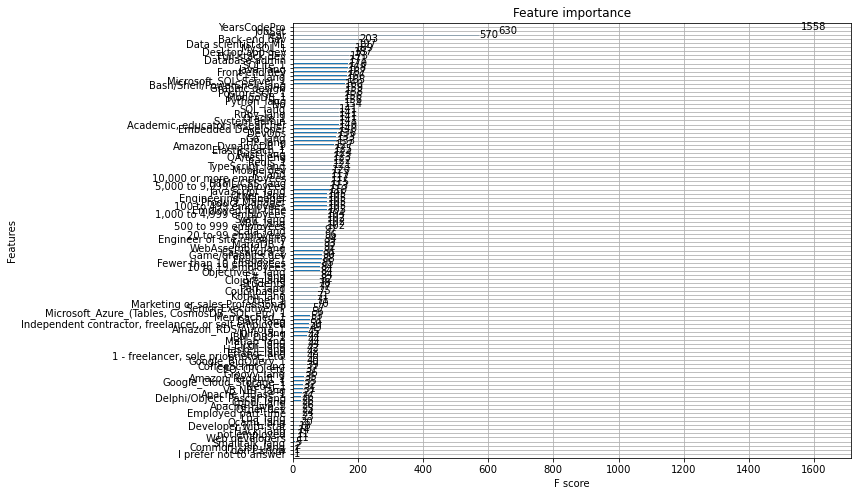

In [65]:
rcParams['figure.figsize'] = 10, 8

xgb.plot_importance(xg_reg)